In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

a = 0.05 # alpha
x = np.arange(0, 1, 0.01)

In [2]:
def pocock_like_error_spending(x, a):
  return a * np.log(1 + (np.e - 1) * x)

def of_like_error_spending(x, a):
  return np.concatenate((
      [0 for i in x[x == 0]],
      2 * (1 - norm.cdf(norm.ppf(1 - a/2) / np.sqrt(x[x > 0])))
    ))

def kd_type_error_spending(x, a, rho):
  return a * x**rho

def uniform_error_spending(x, a):
  return a * x

def hsd_error_spending(x, a, gamma):
  return a * (1 - np.exp(-1 * gamma * x))/(1 - np.exp(-1 * gamma))

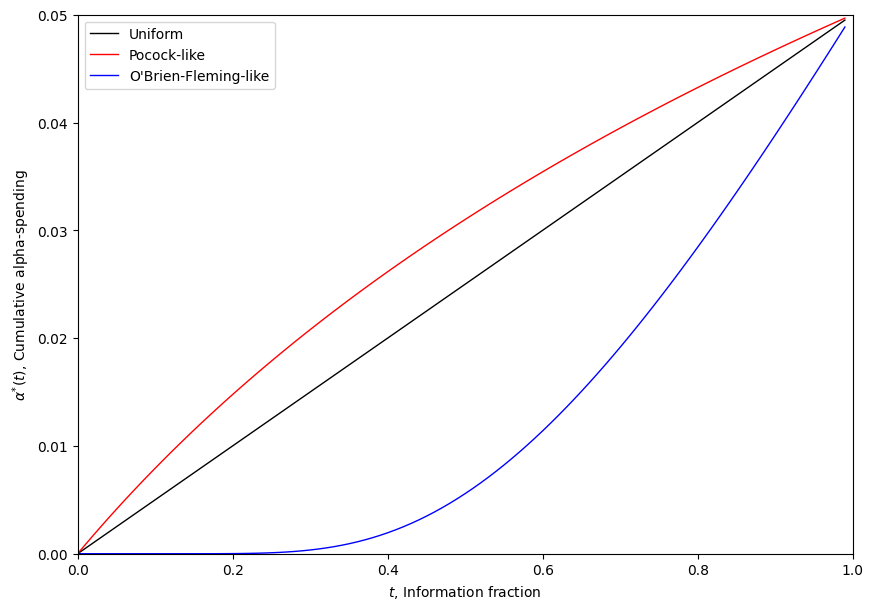

In [10]:
plt.figure(figsize = (10,7))
plt.xlim(0, 1)
plt.ylim(0, a)

plt.plot(x, uniform_error_spending(x, a), color = "black", linewidth = 1, linestyle = "solid", label = "Uniform")
plt.plot(x, pocock_like_error_spending(x, a), color = "red", linewidth = 1, linestyle = "solid", label = "Pocock-like")
plt.plot(x, of_like_error_spending(x, a), color = "blue", linewidth = 1, linestyle = "solid", label = "O'Brien-Fleming-like")

plt.xlabel("$t$, Information fraction")
plt.ylabel("$\\alpha^{*}(t)$, Cumulative alpha-spending")
plt.legend()
plt.show()

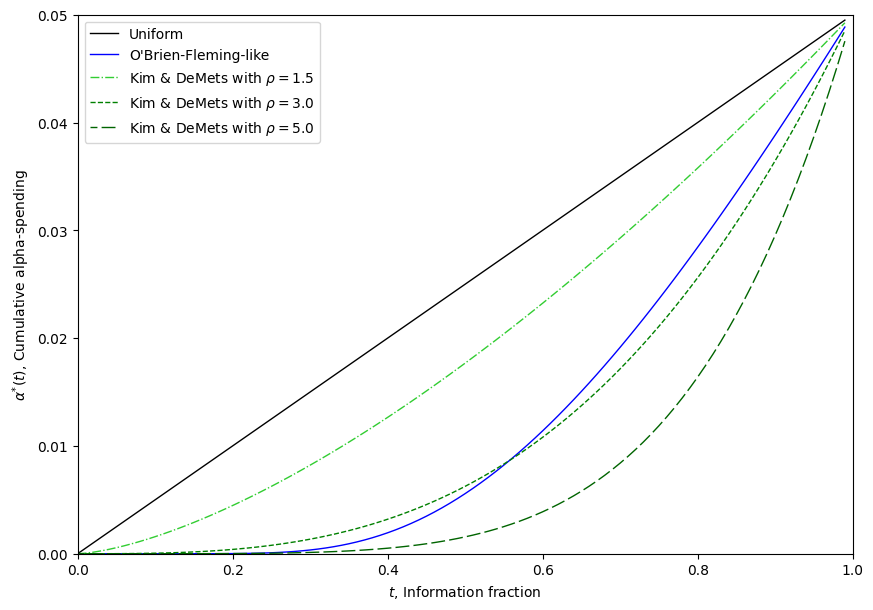

In [19]:
plt.figure(figsize = (10,7))
plt.xlim(0, 1)
plt.ylim(0, a)

plt.plot(x, uniform_error_spending(x, a), color = "black", linewidth = 1, linestyle = "solid", label = "Uniform")
plt.plot(x, of_like_error_spending(x, a), color = "blue", linewidth = 1, linestyle = "solid", label = "O'Brien-Fleming-like")

plt.plot(x, kd_type_error_spending(x, a, 1.5), color = "limegreen", linewidth = 1, linestyle = "dashdot", label = "Kim & DeMets with $\\rho = 1.5$")
plt.plot(x, kd_type_error_spending(x, a, 3.0), color = "green", linewidth = 1, linestyle = "dashed", label = "Kim & DeMets with $\\rho = 3.0$")
plt.plot(x, kd_type_error_spending(x, a, 5.0), color = "darkgreen", linewidth = 1, linestyle = (5, (10, 3)), label = "Kim & DeMets with $\\rho = 5.0$")

plt.xlabel("$t$, Information fraction")
plt.ylabel("$\\alpha^{*}(t)$, Cumulative alpha-spending")
plt.legend()
plt.show()

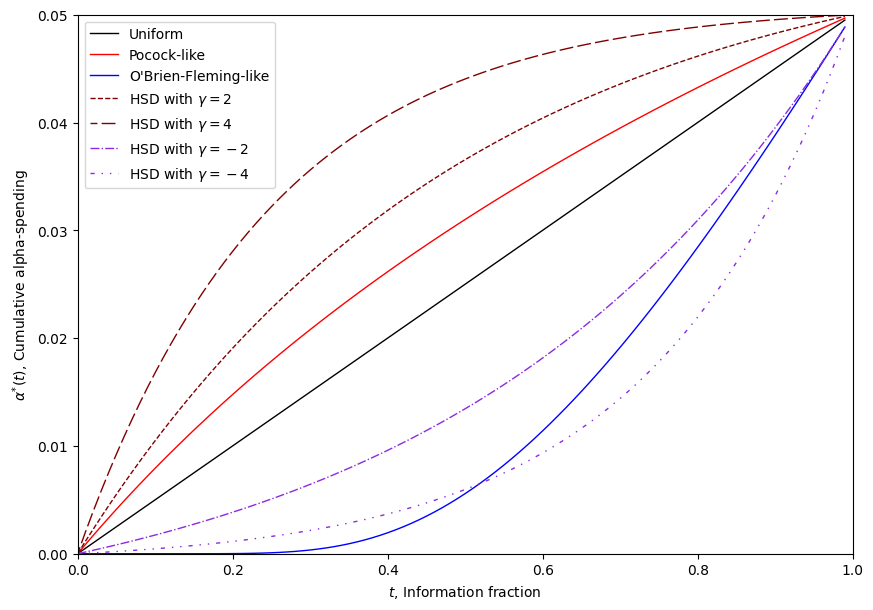

In [17]:
plt.figure(figsize = (10,7))
plt.xlim(0, 1)
plt.ylim(0, a)

plt.plot(x, uniform_error_spending(x, a), color = "black", linewidth = 1, linestyle = "solid", label = "Uniform")
plt.plot(x, pocock_like_error_spending(x, a), color = "red", linewidth = 1, linestyle = "solid", label = "Pocock-like")
plt.plot(x, of_like_error_spending(x, a), color = "blue", linewidth = 1, linestyle = "solid", label = "O'Brien-Fleming-like")

plt.plot(x, hsd_error_spending(x, a, 2), color ="maroon", linewidth= 1, linestyle = "dashed", label="HSD with $\\gamma = 2$")
plt.plot(x, hsd_error_spending(x, a, 4), color ="maroon", linewidth= 1, linestyle = (5, (10, 3)), label="HSD with $\\gamma = 4$")
plt.plot(x, hsd_error_spending(x, a, -2), color ="blueviolet", linewidth= 1, linestyle = "dashdot", label="HSD with $\\gamma = -2$")
plt.plot(x, hsd_error_spending(x, a, -4), color ="blueviolet", linewidth= 1, linestyle = (0, (3, 5, 1, 5, 1, 5)), label="HSD with $\\gamma = -4$")

plt.xlabel("$t$, Information fraction")
plt.ylabel("$\\alpha^{*}(t)$, Cumulative alpha-spending")
plt.legend()
plt.show()

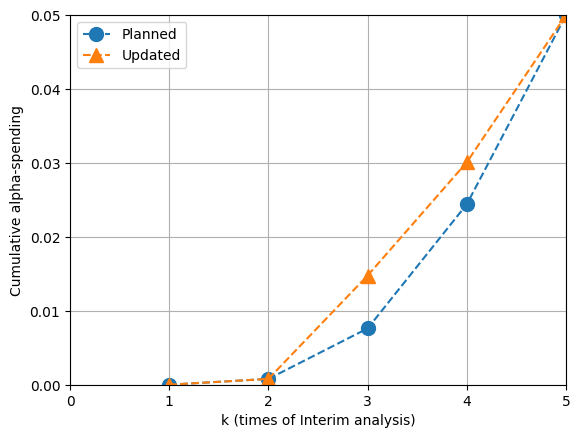

In [14]:
plt.xlim(0, 5)
plt.ylim(0, a)

k = np.array([1, 2, 3, 4, 5])

before = np.array([0.000001078, 0.0007883, 0.007616, 0.02442, 0.0500])
after = np.array([0.000001078, 0.0007883, 0.01477, 0.0301, 0.0500])

plt.plot(k, before, linestyle = "dashed", marker = "o", markersize = 10, label = "Planned")
plt.plot(k, after, linestyle = "dashed", marker = "^", markersize = 10, label = "Updated")

plt.xlabel("k (times of Interim analysis)")
plt.ylabel("Cumulative alpha-spending")
plt.grid()
plt.legend()
plt.show()

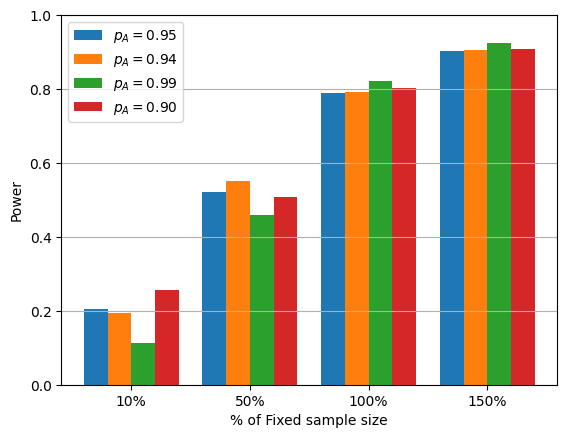

In [62]:
plt.ylim(0, 1)

labels = np.array(["10%", "50%", "100%", "150%"])
x = np.arange(len(labels))
pA_95 = np.array([0.204, 0.521, 0.79, 0.904])
pA_94 = np.array([0.194, 0.551, 0.791, 0.905])
pA_99 = np.array([0.113, 0.459, 0.822, 0.925])
pA_90 = np.array([0.256, 0.508, 0.803, 0.908])

plt.bar(x - 0.3, pA_95, width = 0.2, label = "$p_A = 0.95$")
plt.bar(x - 0.1, pA_94, width = 0.2, label = "$p_A = 0.94$")
plt.bar(x + 0.1, pA_99, width = 0.2, label = "$p_A = 0.99$")
plt.bar(x + 0.3, pA_90, width = 0.2, label = "$p_A = 0.90$")

plt.legend(loc = "upper left")
plt.xticks(x, labels)
plt.grid(which = "major", axis = "y")
plt.xlabel("% of Fixed sample size")
plt.ylabel("Power")
plt.show()

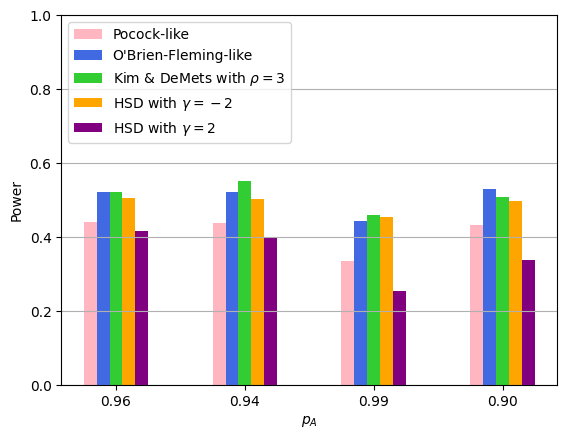

In [56]:
plt.ylim(0, 1)

labels = np.array(["0.96", "0.94", "0.99", "0.90"])
x = np.arange(len(labels))

# 50% of Fixed sampl size
Pocock = np.array([0.439, 0.438, 0.334, 0.431])
OF = np.array([0.522, 0.522, 0.443, 0.529])
KM = np.array([0.521, 0.551, 0.459, 0.508])
HSD_posi = np.array([0.416, 0.399, 0.254, 0.338])
HSD_nega = np.array([0.504, 0.502, 0.454, 0.497])

plt.bar(x - 0.2, Pocock, width = 0.1, color = "lightpink", label = "Pocock-like")
plt.bar(x - 0.1, OF, width = 0.1, color = "royalblue", label = "O'Brien-Fleming-like")
plt.bar(x, KM, width = 0.1, color = "limegreen", label = "Kim & DeMets with $\\rho = 3$")
plt.bar(x + 0.1, HSD_nega, width = 0.1, color = "orange", label = "HSD with $\\gamma = -2$")
plt.bar(x + 0.2, HSD_posi, width = 0.1, color = "purple", label = "HSD with $\\gamma = 2$")

plt.legend(loc = "upper left")
plt.xticks(x, labels)
plt.grid(which = "major", axis = "y")
plt.xlabel("$p_{A}$")
plt.ylabel("Power")
plt.show()

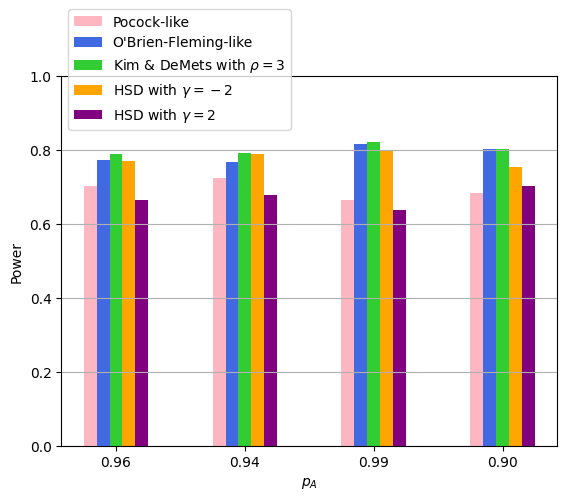

In [57]:
plt.ylim(0, 1)

labels = np.array(["0.96", "0.94", "0.99", "0.90"])
x = np.arange(len(labels))

# 100% of Fixed sampl size
Pocock = np.array([0.702, 0.724, 0.666, 0.684])
OF = np.array([0.773, 0.767, 0.817, 0.803])
KM = np.array([0.79, 0.791, 0.822, 0.803])
HSD_posi = np.array([0.666, 0.679, 0.638, 0.702])
HSD_nega = np.array([0.77, 0.789, 0.797, 0.755])

plt.bar(x - 0.2, Pocock, width = 0.1, color = "lightpink", label = "Pocock-like")
plt.bar(x - 0.1, OF, width = 0.1, color = "royalblue", label = "O'Brien-Fleming-like")
plt.bar(x, KM, width = 0.1, color = "limegreen", label = "Kim & DeMets with $\\rho = 3$")
plt.bar(x + 0.1, HSD_nega, width = 0.1, color = "orange", label = "HSD with $\\gamma = -2$")
plt.bar(x + 0.2, HSD_posi, width = 0.1, color = "purple", label = "HSD with $\\gamma = 2$")

plt.legend(bbox_to_anchor = (0, 1.2), loc = "upper left")
plt.xticks(x, labels)
plt.grid(which = "major", axis = "y")
plt.xlabel("$p_{A}$")
plt.ylabel("Power")
plt.show()